### Analysis and plotting

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import datetime as dt
import xarray as xr
from scipy import stats
import re
from scipy.signal import argrelextrema, argrelmax

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Set font sizes for plots

In [190]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

---

# Open dataset

In [74]:
cues_ds = pd.read_pickle('data/goes-cues_2017-2020.pkl')
cues_ds = cues_ds.to_xarray().squeeze()

### Compute diff

In [75]:
cues_ds['goes_cues_diff'] = cues_ds.goes_tb_c - cues_ds['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)']

In [223]:
def compute_modes(resampled, n=0):
    
    '''Given a resampled xarray object (xarray.core.resample.DataArrayResample),
       compute the modes ( rounding values with np.round(_,n) ), 
       return a pandas dataframe with the modes, counts, and groups (datetime)'''
    
    # Compute modes
    resampled_ModeResults = [stats.mode(np.round(x[1],n)) for x in resampled]
    
    # Get all the modes
    resampled_modes = [x.mode for x in resampled_ModeResults]
    # Reshape result into 1D array
    resampled_modes = np.array(resampled_modes).reshape(len(resampled))
    
    # Get the count for each mode
    resampled_counts = [x.count for x in resampled_ModeResults]
    # Reshape result into 1D array
    resampled_counts = np.array(resampled_counts).reshape(len(resampled))
    
    # Get the group (datetime) for each mode
    resampled_groups = np.array( list(resampled.groups.keys()) )
    
    # Create pandas dataframe
    d = {'modes': resampled_modes, 'counts': resampled_counts}
    df = pd.DataFrame(data=d, index=resampled_groups)
    
    return df

def resampled_stats(resampled, n=0):
    
    '''Given a resampled xarray object (xarray.core.resample.DataArrayResample),
    return a pandas dataframe with the mean, median, modes, counts, and groups (datetime)'''
    
    # Compute modes
    resampled_modes = compute_modes(resampled, n)
    
    # Compute and add mean, medians, modes, counts to a dataframe
    d = {'means': resampled.mean().values, 
         'medians': resampled.median().values, 
         'modes': resampled_modes.modes.values,
         'counts': resampled_modes.counts.values,
         'maxs': resampled.max().values,
         'mins': resampled.min().values,
         'ranges': resampled.max().values - resampled.min().values,
         'stds': resampled.std().values,}
    
    df = pd.DataFrame(data=d, index=resampled_modes.index)
    
    return df

### Resample, compute modes

## 6H resample

In [216]:
resampled_ds = cues_ds.goes_cues_diff.where(cues_ds.cloud_flag==0).resample(datetime='6H')

resampled_df = resampled_stats(resampled_ds, 0)

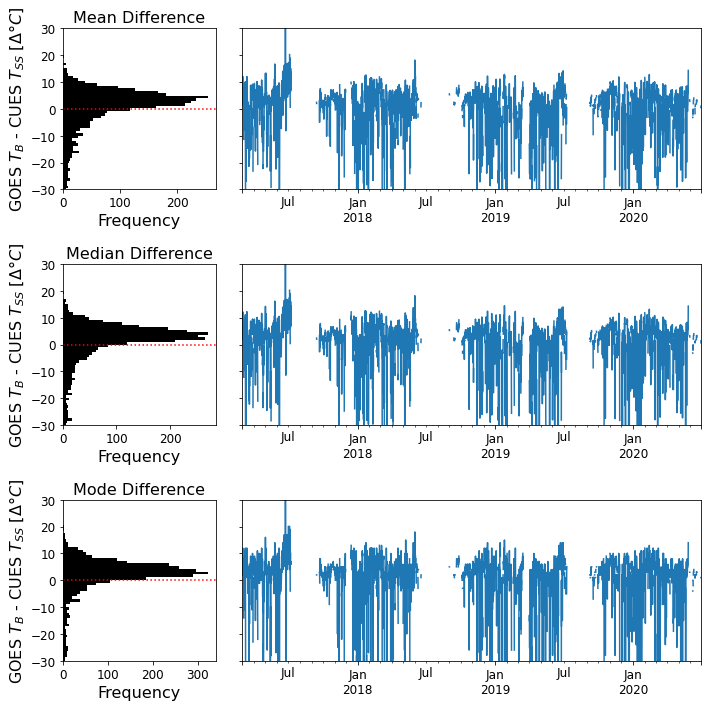

In [220]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10), 
                       tight_layout=True, sharey=True,
                       gridspec_kw={'width_ratios': [1, 3]})

xmin, xmax, ymin, ymax = -20, 20, 0, 400
nbins=100

resampled_df.means.plot.hist(ax=ax[0,0],
                              bins=nbins, 
                              orientation='horizontal',
                              color = '#000000',
                              ec='none',
                              lw=1)
ax[0,0].axhline(0,color='r',linestyle=':')
ax[0,0].set_title('Mean Difference')
#ax[0,0].set_xlim((xmin,xmax))
#ax1.set_ylim((ymin,ymax))

resampled_df.medians.plot.hist(ax=ax[1,0],
                                bins=nbins, 
                                orientation='horizontal',
                                color = '#000000',
                                ec='none',
                                lw=1)
ax[1,0].axhline(0,color='r',linestyle=':')
ax[1,0].set_title('Median Difference')
#ax[1,0].set_xlim((xmin,xmax))
#ax2.set_ylim((ymin,ymax))

resampled_df.modes.plot.hist(ax=ax[2,0],
                                   bins=nbins, 
                                   orientation='horizontal',
                                   color = '#000000',
                                   ec='none',
                                   lw=1)
ax[2,0].axhline(0,color='r',linestyle=':')
ax[2,0].set_title('Mode Difference')
#ax[2,0].set_xlim((xmin,xmax))
#ax3.set_ylim((ymin,ymax))


resampled_df.means.plot(ax=ax[0,1])
resampled_df.medians.plot(ax=ax[1,1])
resampled_df.modes.plot(ax=ax[2,1])


# Format shared y-axis
for this_ax in ax[:,0]:
    this_ax.set_ylim(-30,30);
    this_ax.set_ylabel('GOES $T_{B}$ - CUES $T_{SS}$ [$\Delta\degree C$]')

In [160]:

boxprops = dict(linestyle='-', linewidth=1)
flierprops = dict(marker='.', markerfacecolor='#bbbbbb', markeredgecolor='none', markersize=3,linestyle='none')
medianprops = dict(linestyle='-', linewidth=1)
meanpointprops = dict(marker='o', markeredgecolor='none',markerfacecolor='k')
meanlineprops = dict(linestyle=':', linewidth=1, color='k')
whiskerprops = dict(color='k', linewidth=1, linestyle='-')
capprops = dict(color='k')


<Figure size 432x288 with 0 Axes>

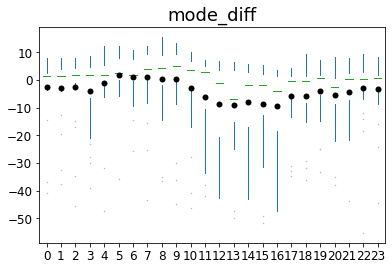

<Figure size 432x288 with 0 Axes>

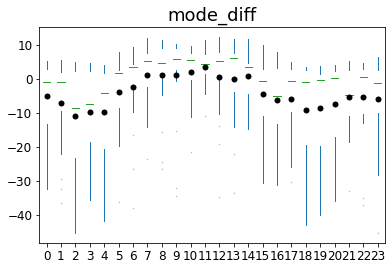

<Figure size 432x288 with 0 Axes>

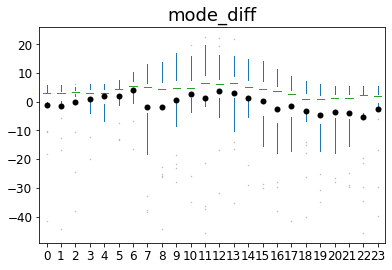

<Figure size 432x288 with 0 Axes>

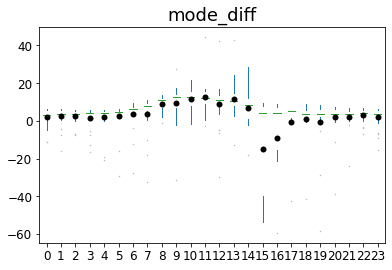

<Figure size 432x288 with 0 Axes>

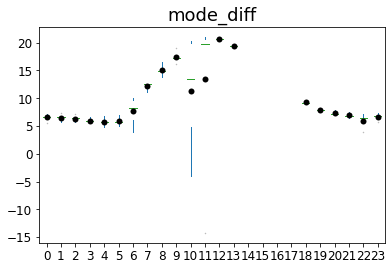

<Figure size 432x288 with 0 Axes>

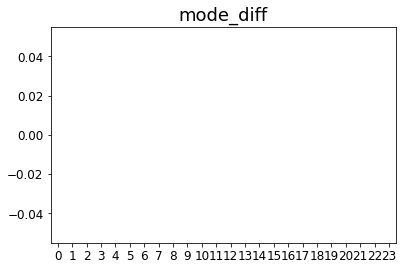

<Figure size 432x288 with 0 Axes>

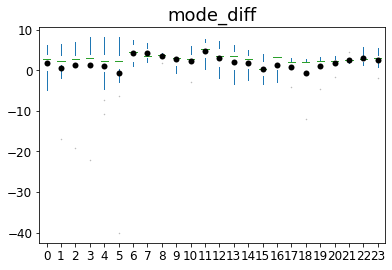

<Figure size 432x288 with 0 Axes>

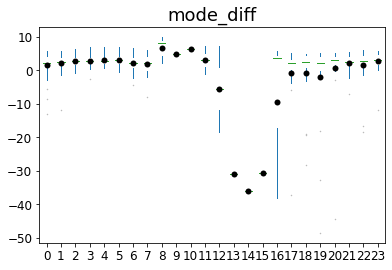

<Figure size 432x288 with 0 Axes>

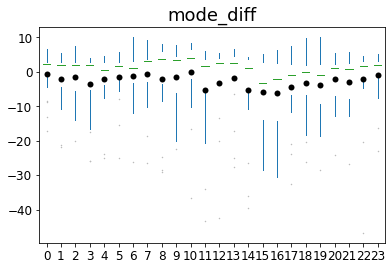

<Figure size 432x288 with 0 Axes>

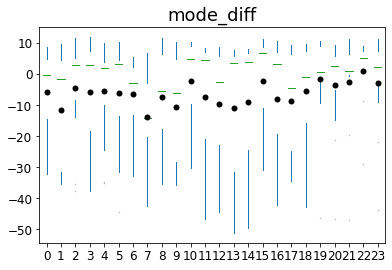

<Figure size 432x288 with 0 Axes>

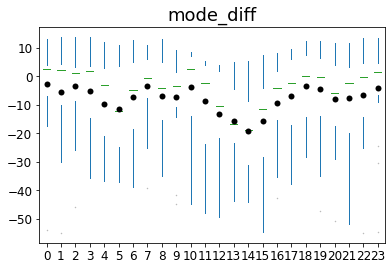

<Figure size 432x288 with 0 Axes>

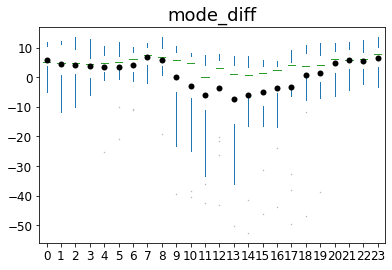

<Figure size 432x288 with 0 Axes>

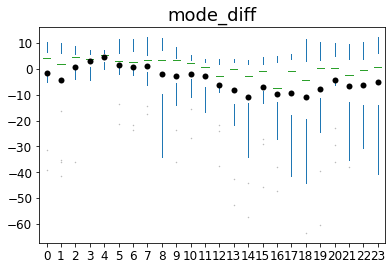

<Figure size 432x288 with 0 Axes>

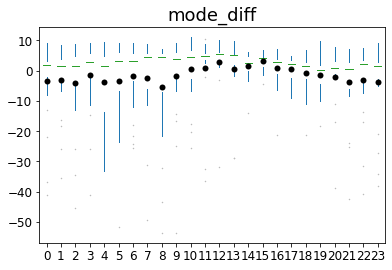

<Figure size 432x288 with 0 Axes>

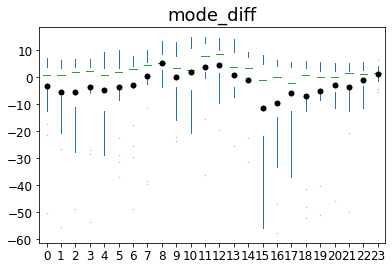

<Figure size 432x288 with 0 Axes>

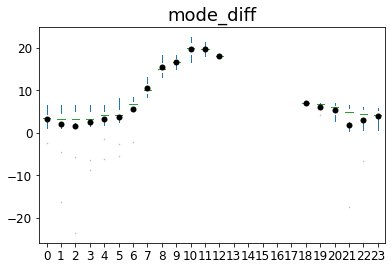

<Figure size 432x288 with 0 Axes>

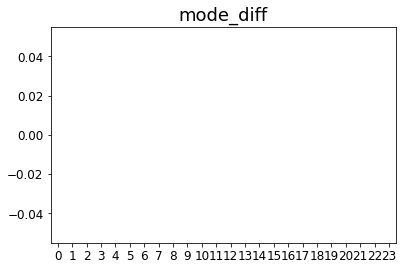

<Figure size 432x288 with 0 Axes>

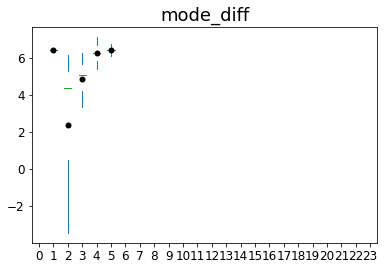

<Figure size 432x288 with 0 Axes>

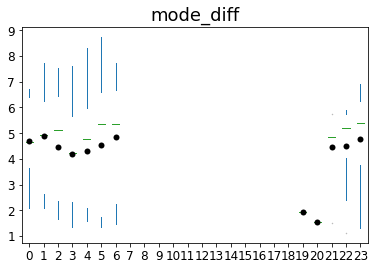

<Figure size 432x288 with 0 Axes>

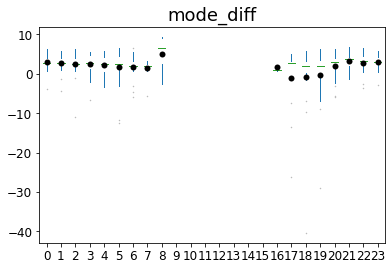

<Figure size 432x288 with 0 Axes>

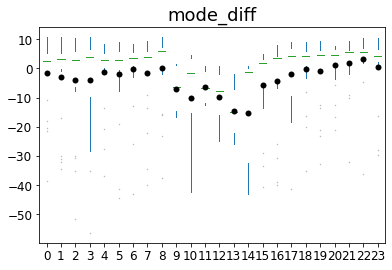

<Figure size 432x288 with 0 Axes>

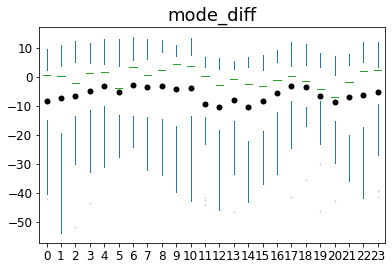

<Figure size 432x288 with 0 Axes>

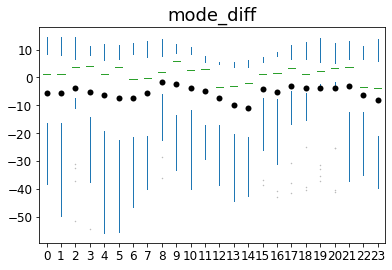

<Figure size 432x288 with 0 Axes>

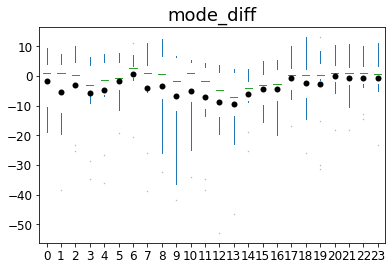

<Figure size 432x288 with 0 Axes>

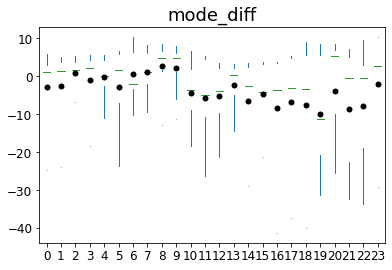

<Figure size 432x288 with 0 Axes>

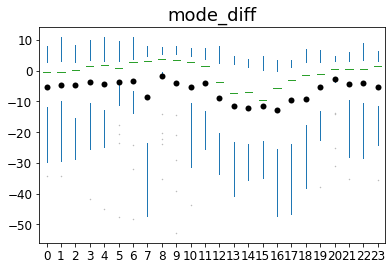

<Figure size 432x288 with 0 Axes>

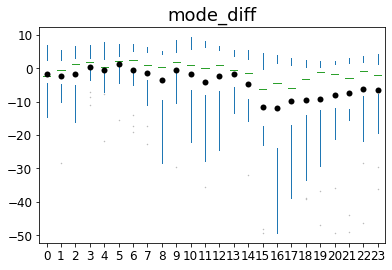

<Figure size 432x288 with 0 Axes>

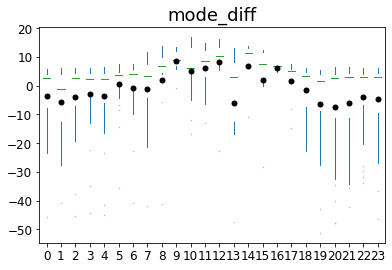

<Figure size 432x288 with 0 Axes>

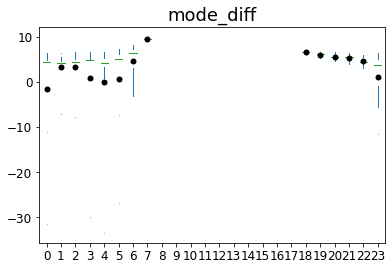

<Figure size 432x288 with 0 Axes>

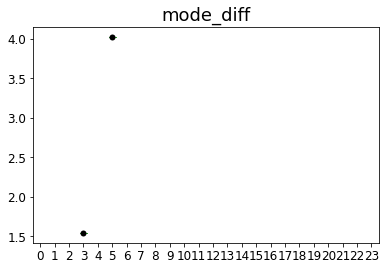

<Figure size 432x288 with 0 Axes>

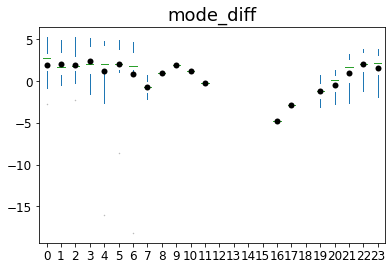

<Figure size 432x288 with 0 Axes>

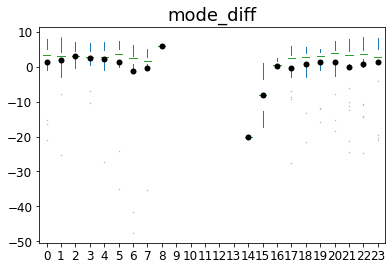

<Figure size 432x288 with 0 Axes>

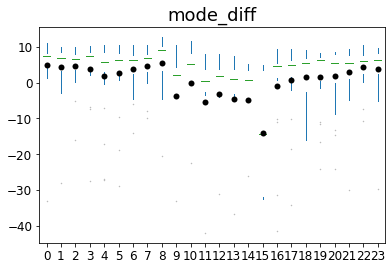

<Figure size 432x288 with 0 Axes>

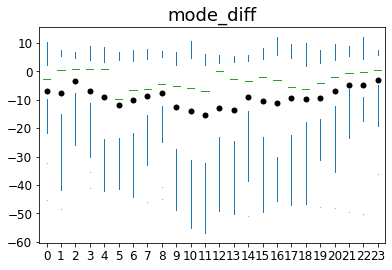

<Figure size 432x288 with 0 Axes>

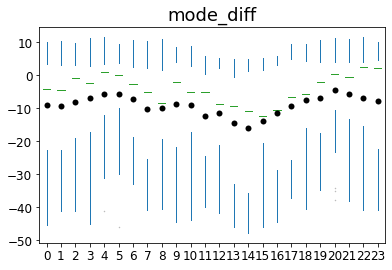

<Figure size 432x288 with 0 Axes>

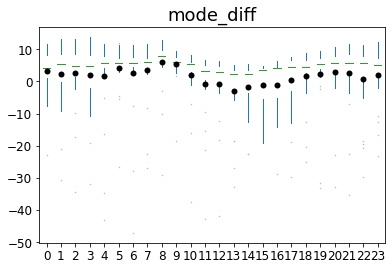

<Figure size 432x288 with 0 Axes>

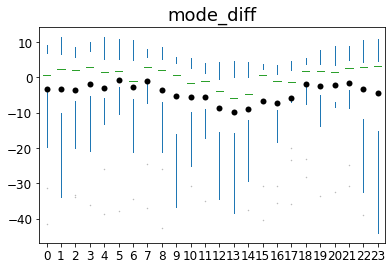

<Figure size 432x288 with 0 Axes>

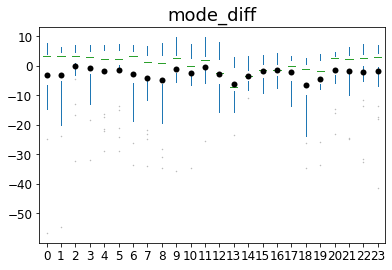

<Figure size 432x288 with 0 Axes>

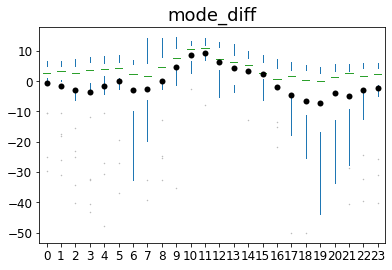

<Figure size 432x288 with 0 Axes>

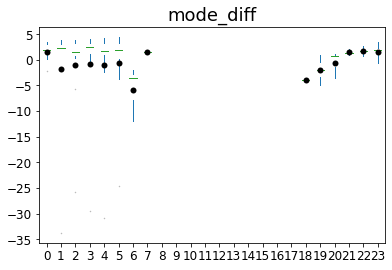

In [168]:
for year in df.index.year.unique():
    mask = df.index.year==year
    df_n = df.loc[mask]
    
    for month in df_n.index.month.unique():
        mask = df_n.index.month==month
        df_m = df_n.loc[mask]
        
        plt.figure()
        df_m.boxplot(column='mode_diff', by=df_m.index.hour,
                    grid=False,
                    meanline=False,
                    showbox=False,
                    showcaps=False,
                    showmeans=True,
                    #color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                    boxprops=boxprops,
                    whiskerprops=whiskerprops,
                    capprops=capprops,
                    flierprops=flierprops,
                    medianprops=medianprops,
                    meanprops=meanpointprops)
        
        plt.suptitle('') # this removes pandas' default title
        plt.xlabel('') # this removes pandas' default x labels
        

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

    # MAE Boxplots
    boxplot = df_m.boxplot(column='mbe', by=df_m.index.hour,
                         ax=ax[1],
                         backend='matplotlib',
                         grid=False,
                         meanline=False,
                         showbox=False,
                         showcaps=False,
                         showmeans=True,
                         color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                         boxprops=boxprops,
                         whiskerprops=whiskerprops,
                         capprops=capprops,
                         flierprops=flierprops,
                         medianprops=medianprops,
                         meanprops=meanpointprops)
    ax[1].set_title('Mean Bias\nby Hour of Day ({})'.format(month))
    plt.suptitle('') # this removes pandas' default title
    ax[1].set_xlabel('') # this removes pandas' default x labels
    # Boxplot x-axis formatting
    #plt.xticks(rotation=45, horizontalalignment='center');
    ax[1].axhline(0,linestyle=':',color='r')


    # MAE Histogram
    ax[0].hist(df_m.mbe,
               bins=int((df_m.mbe.max() - df_m.mbe.min())/2)+1,
               orientation='horizontal',
               color = '#000000',
               ec='none',
               lw=1)
    ax[0].axhline(0,linestyle=':',color='r')
    ax[0].set_title('Mean Bias\nHistogram ({})'.format(month))
    # Histogram x-axis formatting
    ax[0].set_xlabel('number of 1-hour periods')
    ax[0].set_xlim(0,500)

    # Format shared y-axis
    plt.ylim(-30,30);
    ax[0].set_ylabel('Mean Bias [$\degree C$]')

    plt.tight_layout()
    plt.savefig('figures/mean-bias-hourly-{}.jpg'.format(month))

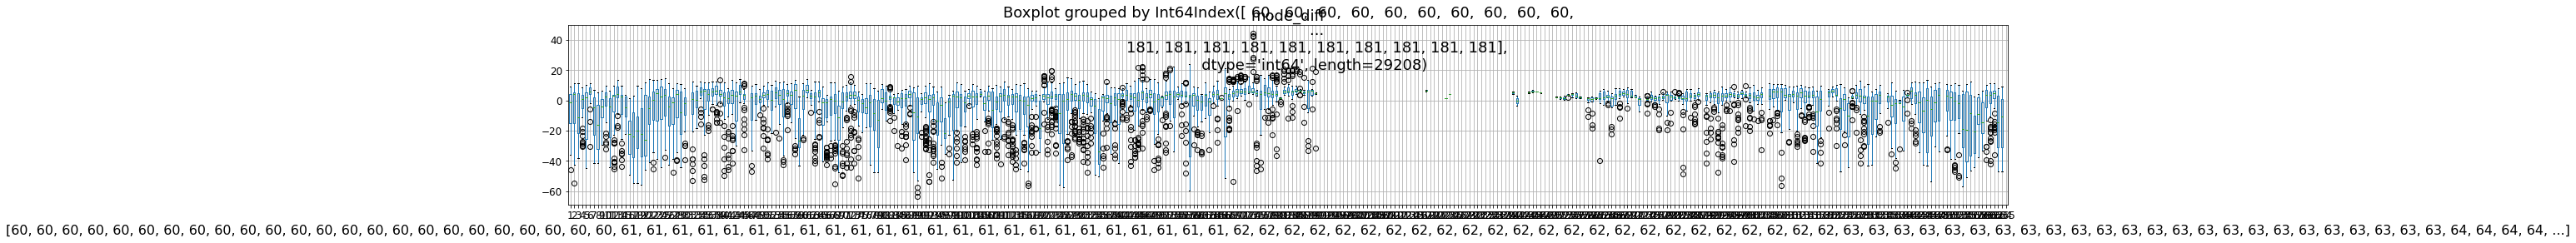

In [154]:
fig, ax = plt.subplots(figsize=(30,4))

boxplot = df.boxplot(column='mode_diff', by=df.index.dayofyear, ax=ax)

In [138]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True, gridspec_kw={'width_ratios': [1, 3]})

# Boxplots
boxplot = df.boxplot(column='mean_diff', by=index.month,
                            ax=ax[1],
                            backend='matplotlib',
                            grid=False,
                            meanline=False,
                            showbox=False,
                            showcaps=False,
                            showmeans=True,
                            color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                            boxprops=boxprops,
                            whiskerprops=whiskerprops,
                            capprops=capprops,
                            flierprops=flierprops,
                            medianprops=medianprops,
                            meanprops=meanpointprops)
ax[1].set_title('Mean Absolute Difference by Month-Year')
plt.suptitle('') # this removes pandas' default title
# Boxplot x-axis formatting
plt.xticks(rotation=45, horizontalalignment='center');

# Histogram
ax[0].hist(df_snow_6.mae,
           bins=int(np.sqrt(len(df_snow_6.mae))),
           orientation='horizontal',
           color = '#000000',
           ec='none',
           lw=1)
ax[0].set_title('Histogram')
# Histogram x-axis formatting
ax[0].set_xlabel('number of 6-hour periods')

# Format shared y-axis
plt.ylim(0,30);
ax[0].set_ylabel('Mean Absolute Difference [$\degree C$]')

plt.tight_layout()
plt.savefig('figures/mean-absolute-difference-monthly.jpg')

,mean_diff,median_diff,mode_diff,mode_count_diff
2017-03-01 00:00:00,7.570866,7.494033,6.56,1
2017-03-01 01:00:00,7.341630,7.490804,6.05,1
2017-03-01 02:00:00,7.119483,7.082574,5.40,1
2017-03-01 03:00:00,8.675974,8.539158,8.54,2
2017-03-01 04:00:00,8.805983,8.981288,7.46,1
...,...,...,...,...
2020-06-29 19:00:00,NaN,NaN,NaN,1
2020-06-29 20:00:00,NaN,NaN,NaN,1
2020-06-29 21:00:00,2.114380,2.114380,2.11,1
2020-06-29 22:00:00,2.123812,2.169039,1.83,1


/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1115: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


Text(0.5, 1.0, 'DOY Median Difference\n(GOES Tb - CUES Tss)')

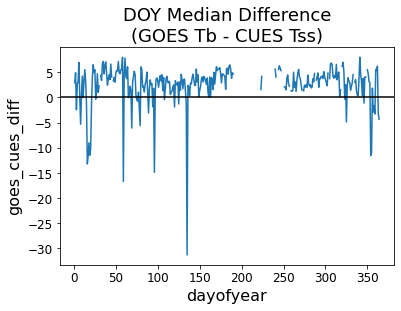

In [84]:
cues_ds.goes_cues_diff.where(cues_ds.cloud_flag==0).groupby("datetime.dayofyear").median().plot()
plt.axhline(0,color='k')
plt.title('DOY Median Difference\n(GOES Tb - CUES Tss)')


(-40.0, 40.0)

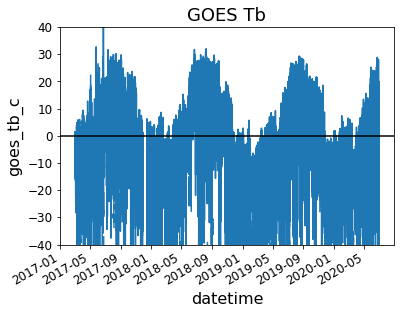

In [82]:

cues_ds.goes_tb_c.where(cues_ds.cloud_flag==0).plot()
plt.axhline(0,color='k')
plt.title('GOES Tb')
plt.ylim(-40,40)



(-40.0, 40.0)

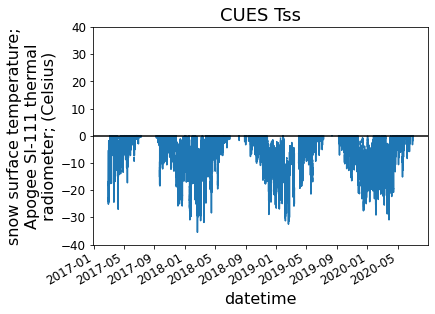

In [83]:
cues_ds['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)'].where(cues_ds.cloud_flag==0).plot()
plt.axhline(0,color='k')
plt.title('CUES Tss')
plt.ylim(-40,40)

---

# Boxplots and Histograms

Boxplot Customization

In [156]:

boxprops = dict(linestyle='-', linewidth=1)
flierprops = dict(marker='.', markerfacecolor='#bbbbbb', markeredgecolor='none', markersize=3,linestyle='none')
medianprops = dict(linestyle='-', linewidth=1)
meanpointprops = dict(marker='o', markeredgecolor='none',markerfacecolor='k')
meanlineprops = dict(linestyle=':', linewidth=1, color='k')
whiskerprops = dict(color='k', linewidth=1, linestyle='-')
capprops = dict(color='k')


## Mean Absolute Difference

In [70]:
cues_df = cues_ds.to_dataframe()

In [68]:
cues_ds.goes_cues_diff.where(cues_ds.cloud_flag==0).resample(datetime='1M').mean().boxplot()

/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


AttributeError: 'DataArray' object has no attribute 'boxplot'

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True, gridspec_kw={'width_ratios': [1, 3]})

# Boxplots
boxplot = df_snow_6.boxplot(column='mae', by='year_month',
                            ax=ax[1],
                            backend='matplotlib',
                            grid=False,
                            meanline=False,
                            showbox=False,
                            showcaps=False,
                            showmeans=True,
                            color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                            boxprops=boxprops,
                            whiskerprops=whiskerprops,
                            capprops=capprops,
                            flierprops=flierprops,
                            medianprops=medianprops,
                            meanprops=meanpointprops)
ax[1].set_title('Mean Absolute Difference by Month-Year')
plt.suptitle('') # this removes pandas' default title
# Boxplot x-axis formatting
plt.xticks(rotation=45, horizontalalignment='center');

# Histogram
ax[0].hist(df_snow_6.mae,
           bins=int(np.sqrt(len(df_snow_6.mae))),
           orientation='horizontal',
           color = '#000000',
           ec='none',
           lw=1)
ax[0].set_title('Histogram')
# Histogram x-axis formatting
ax[0].set_xlabel('number of 6-hour periods')

# Format shared y-axis
plt.ylim(0,30);
ax[0].set_ylabel('Mean Absolute Difference [$\degree C$]')

plt.tight_layout()
plt.savefig('figures/mean-absolute-difference-monthly.jpg')

Text(0, 0.5, 'LWd_cs')

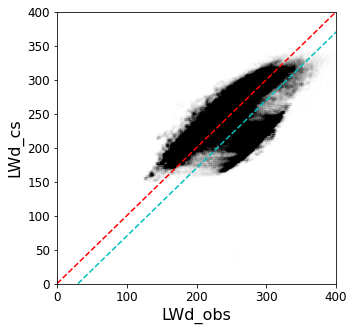

In [14]:
x = cues_ds['upward looking longwave radiation; uplooking Eppley lab precision infrared long wave radiometer; (Watts/meter^2)']
y = cues_ds.lclr_mean

plt.subplots(figsize=(5,5))
plt.plot(x,y,linestyle='none',marker='.',color='k',alpha=0.002)
plt.xlim(0,400)
plt.ylim(0,400)
plt.plot([0,400],[0,400],linestyle='--',color='r')
plt.plot([30,430],[0,400],linestyle='--',color='c')
plt.xlabel('LWd_obs')
plt.ylabel('LWd_cs')

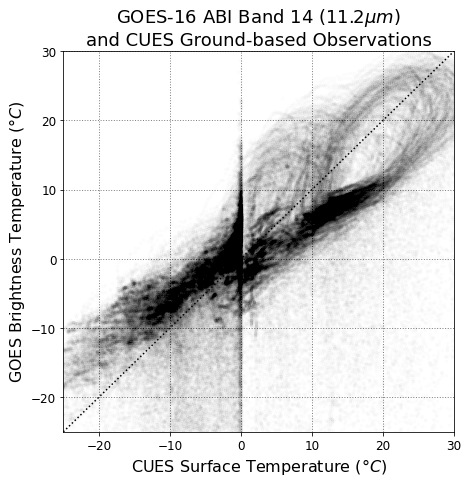

In [15]:
plt.figure(figsize=(7,7))
# gridlines
plt.grid(color='grey', linestyle=':', linewidth=1)


# GOES Tb vs Surface Temp
plt.plot(cues_ds.surface_temperature.where(cues_ds.cloud_flag==0),
         cues_ds.goes_tb_c.where(cues_ds.cloud_flag==0),
         '.k',alpha=0.007)

plt.ylabel('GOES Brightness Temperature ($\degree C$)')
plt.xlabel('CUES Surface Temperature ($\degree C$)')
plt.xlim([-25,30])
plt.ylim([-25,30])

# 1-to-1 line for reference
plt.plot([-25,30],[-25,30],'k:')

# add legend
#plt.legend()

# zero lines for reference
#plt.plot([-25,20],[0,0],':',c='lightgrey')
#plt.plot([0,0],[-25,20],':',c='lightgrey')

plt.title('GOES-16 ABI Band 14 ($11.2 \mu m$)\nand CUES Ground-based Observations');

### for inspecting the entire time series (6-hr)

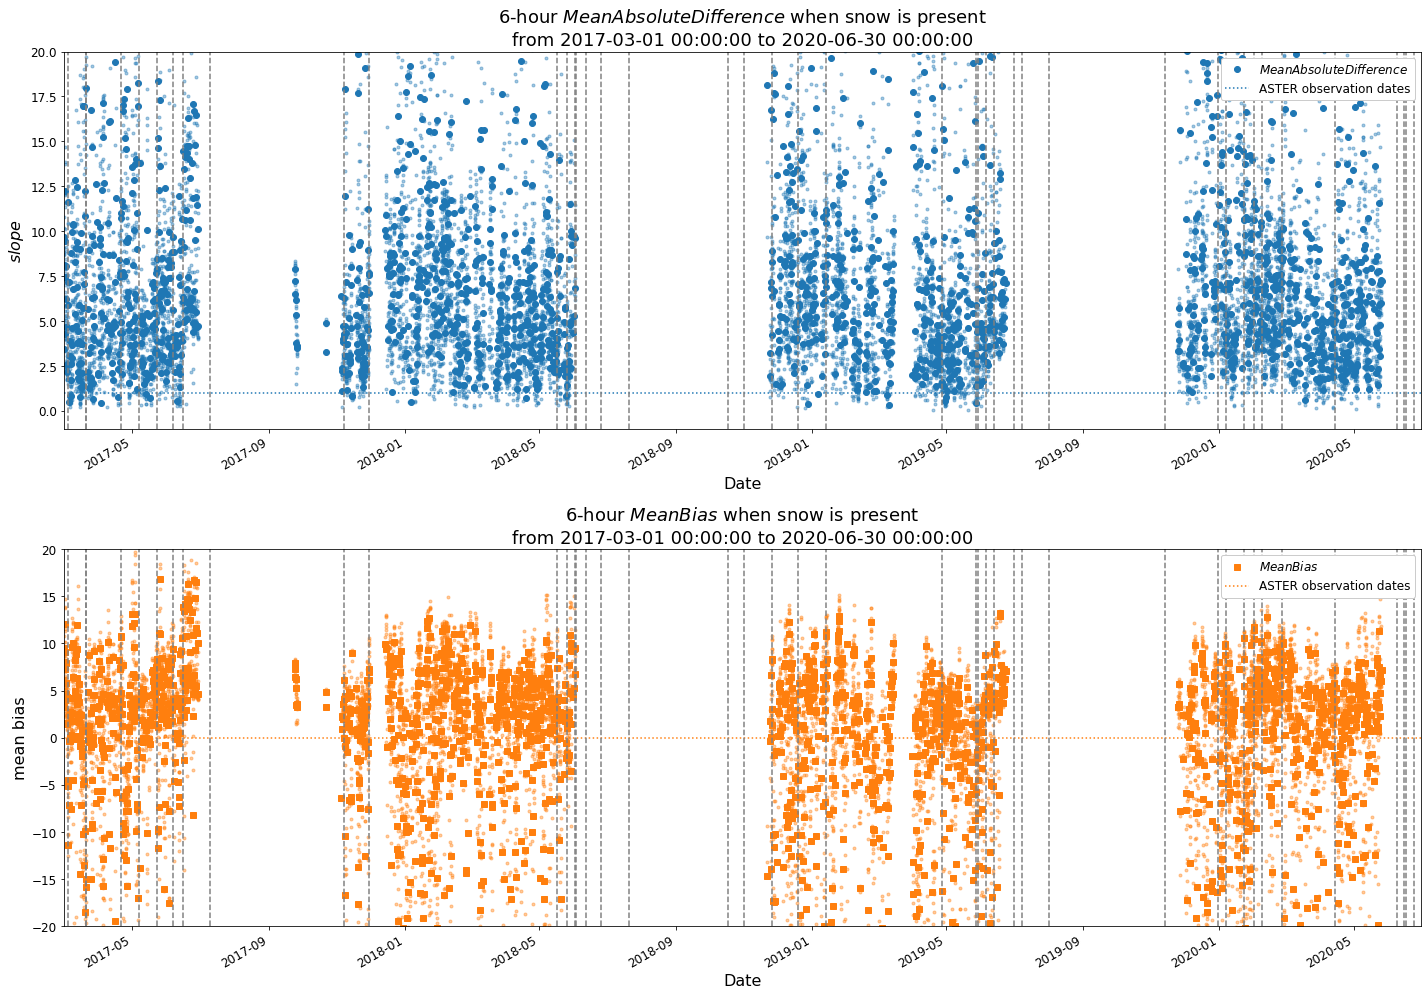

In [64]:
# Set start and end dates for time period we want to look at
startdate = pd.Timestamp('2017-03-01')
enddate = pd.Timestamp('2020-06-30')

# Set up figure
fig, ax = plt.subplots(2,1,figsize=(20,14))

df_snow_6.rmse.plot(linestyle='none',marker='o',c='tab:blue',ax=ax[0], label='slope')
df_snow_1.rmse.plot(linestyle='none',marker='.',c='tab:blue',ax=ax[0], alpha=0.4)
ax[0].axhline(y=1,linestyle=':',color='tab:blue')
ax[0].set_ylim([-1,20])
ax[0].set_ylabel('$slope$')

#ax2 = ax.twinx()
#df.rmse.plot(linestyle='-',marker='.',c='tab:orange',ax=ax2)
#df.mae.plot(linestyle='-',marker='.',c='tab:red',ax=ax2)
df_snow_6.mbe.plot(linestyle='none',marker='s',c='tab:orange',ax=ax[1], label='mean bias')
df_snow_1.mbe.plot(linestyle='none',marker='.',c='tab:orange',ax=ax[1], alpha=0.4)
ax[1].axhline(y=0,linestyle=':',color='tab:orange')
ax[1].set_ylim([-20,20])
ax[1].set_ylabel('mean bias')


ax[0].set_xlim([startdate,enddate])
ax[0].set_xlabel('Date')
ax[1].set_xlim([startdate,enddate])
ax[1].set_xlabel('Date')

# Plot when we have ASTER observations of the CUES site
for aster_datetime in aster.datetime:
    ax[0].axvline(x=aster_datetime, color='grey', linestyle='--')
    ax[1].axvline(x=aster_datetime, color='grey', linestyle='--')

# Set titles
ax[0].set_title('6-hour $Mean Absolute Difference$ when snow is present\nfrom {} to {}'.format(startdate,enddate));
ax[1].set_title('6-hour $Mean Bias$ when snow is present\nfrom {} to {}'.format(startdate,enddate));
# make legends
lines = [ax[0].lines[0], ax[0].lines[2]]
labels = ['$Mean Absolute Difference$', 'ASTER observation dates']
ax[0].legend(lines, labels, loc='upper right', facecolor='white', framealpha=1)
lines = [ax[1].lines[0], ax[1].lines[2]]
labels = ['$Mean Bias$', 'ASTER observation dates']
ax[1].legend(lines, labels, loc='upper right', facecolor='white', framealpha=1)

# Save figure image
plt.tight_layout()
#plt.savefig('goes-vs-cues-2017-2020.jpg',dip=300);

Boxplot customization

In [20]:
boxprops = dict(linestyle='-', linewidth=1)
flierprops = dict(marker='.', markerfacecolor='#bbbbbb', markeredgecolor='none', markersize=3,linestyle='none')
medianprops = dict(linestyle='-', linewidth=1)
meanpointprops = dict(marker='o', markeredgecolor='none',markerfacecolor='k')
meanlineprops = dict(linestyle=':', linewidth=1, color='k')
whiskerprops = dict(color='k', linewidth=1, linestyle='-')
capprops = dict(color='k')


### Look at difference between 6-hourly and 1-hourly stats

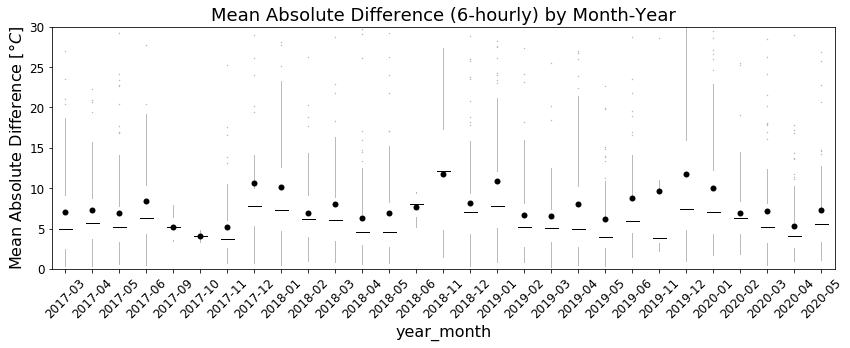

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5), sharex=True)



# Boxplots for snow vs GOES
boxplot = df_snow_6.boxplot(column='mae', by='year_month',
                          ax=ax,
                          backend='matplotlib',
                          grid=False,
                          meanline=False,
                          showbox=False,
                          showcaps=False,
                          showmeans=True,
                          color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                          boxprops=boxprops,
                          whiskerprops=whiskerprops,
                          capprops=capprops,
                          flierprops=flierprops,
                          medianprops=medianprops,
                          meanprops=meanpointprops)



ax.set_title('Mean Absolute Difference (6-hourly) by Month-Year')
plt.suptitle('') # this removes pandas' default title
# Boxplot x-axis formatting
plt.xticks(rotation=45, horizontalalignment='center');
plt.ylim(0,30);
ax.set_ylabel('Mean Absolute Difference [$\degree C$]')



plt.tight_layout()
#plt.savefig('figures/mean-absolute-difference-monthly.jpg')

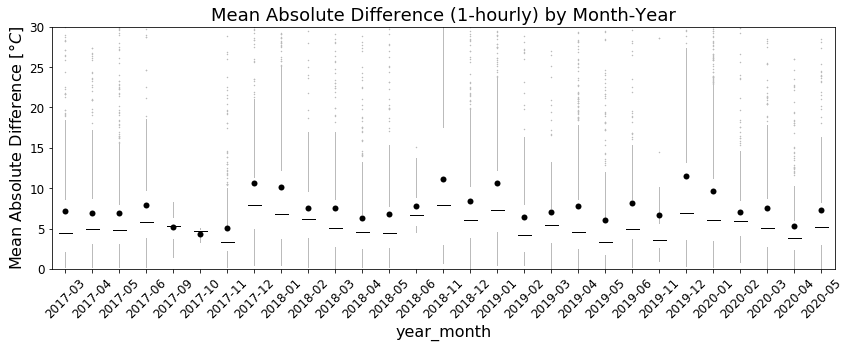

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,5), sharex=True)



# Boxplots for snow vs GOES
boxplot = df_snow_1.boxplot(column='mae', by='year_month',
                          ax=ax,
                          backend='matplotlib',
                          grid=False,
                          meanline=False,
                          showbox=False,
                          showcaps=False,
                          showmeans=True,
                          color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                          boxprops=boxprops,
                          whiskerprops=whiskerprops,
                          capprops=capprops,
                          flierprops=flierprops,
                          medianprops=medianprops,
                          meanprops=meanpointprops)



ax.set_title('Mean Absolute Difference (1-hourly) by Month-Year')
plt.suptitle('') # this removes pandas' default title
# Boxplot x-axis formatting
plt.xticks(rotation=45, horizontalalignment='center');
plt.ylim(0,30);
ax.set_ylabel('Mean Absolute Difference [$\degree C$]')



plt.tight_layout()
#plt.savefig('figures/mean-absolute-difference-monthly.jpg')

### Mean Absolute Difference

by Month-Year for 6-hourly stats

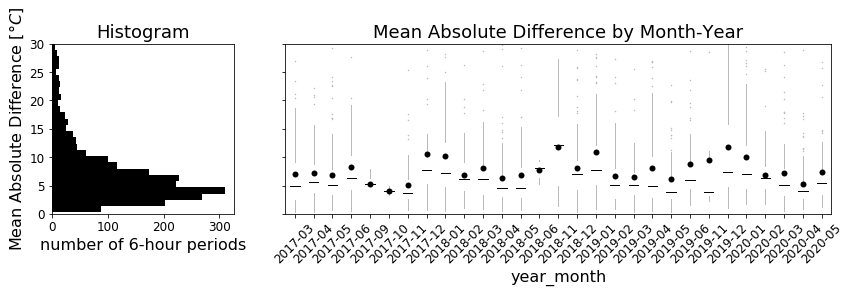

In [37]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True, gridspec_kw={'width_ratios': [1, 3]})

# Boxplots
boxplot = df_snow_6.boxplot(column='mae', by='year_month',
                            ax=ax[1],
                            backend='matplotlib',
                            grid=False,
                            meanline=False,
                            showbox=False,
                            showcaps=False,
                            showmeans=True,
                            color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                            boxprops=boxprops,
                            whiskerprops=whiskerprops,
                            capprops=capprops,
                            flierprops=flierprops,
                            medianprops=medianprops,
                            meanprops=meanpointprops)
ax[1].set_title('Mean Absolute Difference by Month-Year')
plt.suptitle('') # this removes pandas' default title
# Boxplot x-axis formatting
plt.xticks(rotation=45, horizontalalignment='center');

# Histogram
ax[0].hist(df_snow_6.mae,
           bins=int(np.sqrt(len(df_snow_6.mae))),
           orientation='horizontal',
           color = '#000000',
           ec='none',
           lw=1)
ax[0].set_title('Histogram')
# Histogram x-axis formatting
ax[0].set_xlabel('number of 6-hour periods')

# Format shared y-axis
plt.ylim(0,30);
ax[0].set_ylabel('Mean Absolute Difference [$\degree C$]')

plt.tight_layout()
plt.savefig('figures/mean-absolute-difference-monthly.jpg')

### Mean Bias

by Month-Year for 6-hourly stats

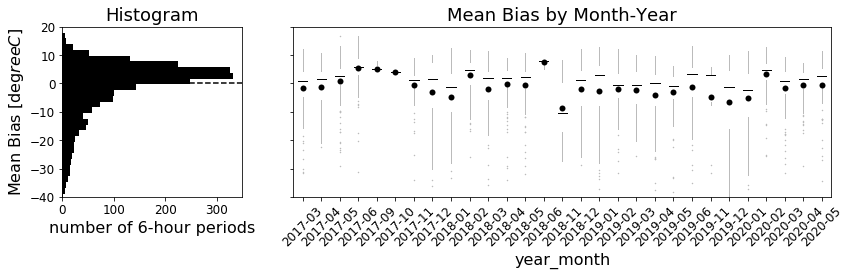

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True, gridspec_kw={'width_ratios': [1, 3]})

# Boxplots
boxplot = df_snow_6.boxplot(column='mbe', by='year_month',
                            ax=ax[1],
                            backend='matplotlib',
                            grid=False,
                            meanline=False,
                            showbox=False,
                            showcaps=False,
                            showmeans=True,
                            color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                            boxprops=boxprops,
                            whiskerprops=whiskerprops,
                            capprops=capprops,
                            flierprops=flierprops,
                            medianprops=medianprops,
                            meanprops=meanpointprops)
ax[1].set_title('Mean Bias by Month-Year')
plt.suptitle('') # this removes pandas' default title
# Boxplot x-axis formatting
plt.xticks(rotation=45, horizontalalignment='center');

# Histogram
ax[0].hist(df_snow_6.mbe,
           bins=int(np.sqrt(len(df_snow_6.mbe))),
           orientation='horizontal',
           color = '#000000',
           ec='none',
           lw=1)
ax[0].axhline(y=0,linestyle='--',color='k')
ax[0].set_title('Histogram')
# Histogram x-axis formatting
ax[0].set_xlabel('number of 6-hour periods')

# Format shared y-axis
plt.ylim(-40,20);
ax[0].set_ylabel('Mean Bias [$\degreeC$]')

plt.tight_layout()
plt.savefig('figures/mean-biases-monthly.jpg')

**Mean Bias**

by month for each year, 6-hourly

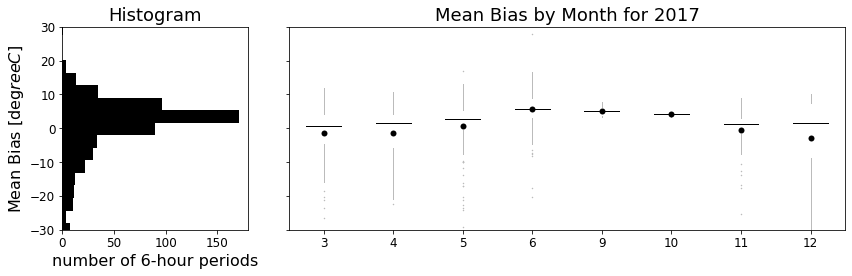

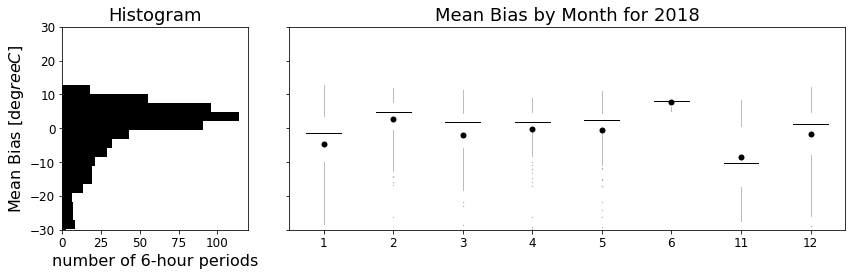

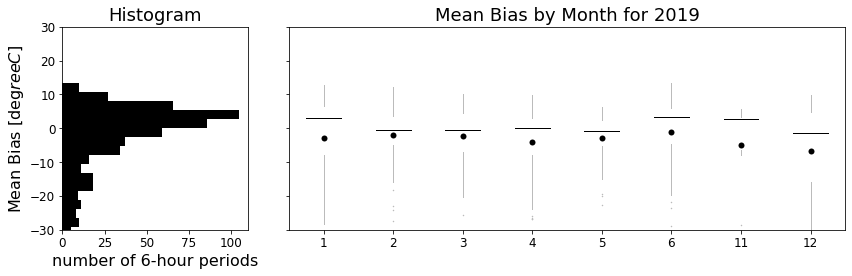

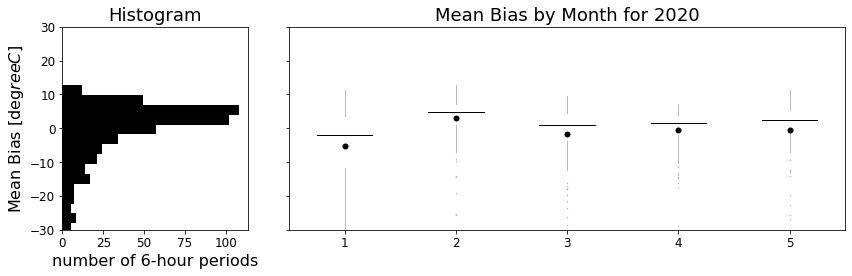

In [40]:
df = df_snow_6.copy()
for year in df.index.year.unique():
    
    mask = df.index.year==year
    df_n = df.loc[mask]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), sharey=True, gridspec_kw={'width_ratios': [1, 3]})
    
    # Boxplots
    boxplot = df_n.boxplot(column='mbe', by=df_n.index.month,
                         ax=ax[1],
                         backend='matplotlib',
                         grid=False,
                         meanline=False,
                         showbox=False,
                         showcaps=False,
                         showmeans=True,
                         color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                         boxprops=boxprops,
                         whiskerprops=whiskerprops,
                         capprops=capprops,
                         flierprops=flierprops,
                         medianprops=medianprops,
                         meanprops=meanpointprops)
    ax[1].set_title('Mean Bias by Month for {}'.format(year))
    plt.suptitle('') # this removes pandas' default title
    ax[1].set_xlabel('') # this removes pandas' default x labels
    # Boxplot x-axis formatting
    #plt.xticks(rotation=45, horizontalalignment='center');
    
    # Histogram
    ax[0].hist(df_n.mbe,
               bins=int(np.sqrt(len(df_n.mbe))),
               orientation='horizontal',
               color = '#000000',
               ec='none',
               lw=1)
    ax[0].set_title('Histogram')
    # Histogram x-axis formatting
    ax[0].set_xlabel('number of 6-hour periods')
    
    # Format shared y-axis
    plt.ylim(-30,30);
    ax[0].set_ylabel('Mean Bias [$\degreeC$]')
    
    plt.tight_layout()
    plt.savefig('figures/mean-bias-monthly-{}.jpg'.format(year))

### Mean Bias

Look at hour of day for each month (using the 1-hourly stats)

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

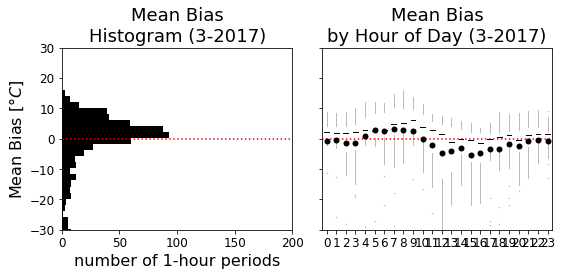

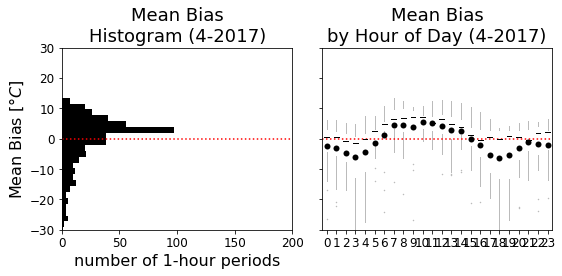

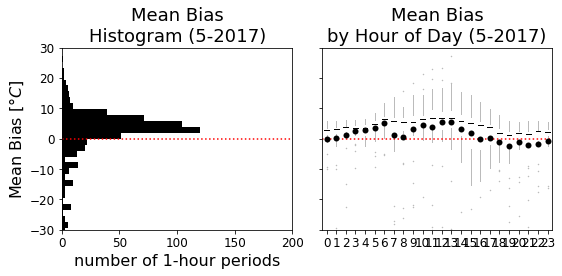

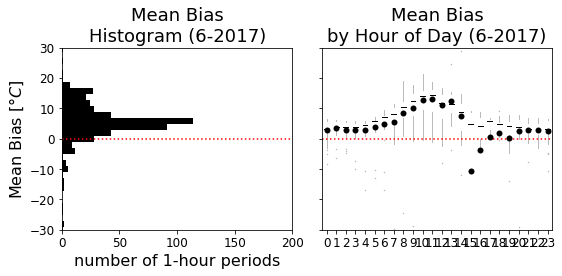

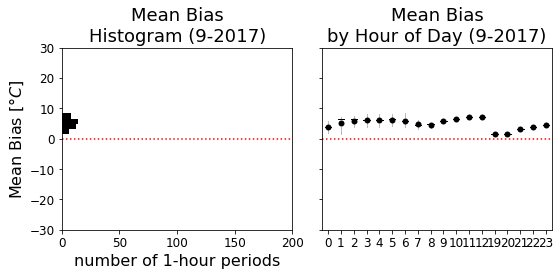

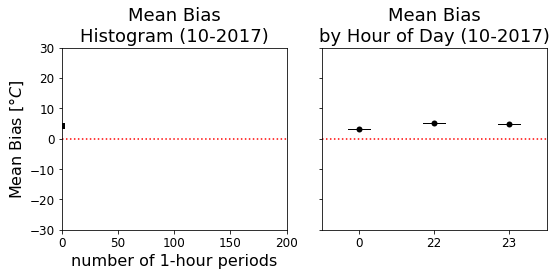

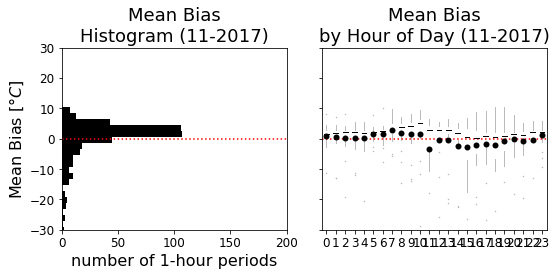

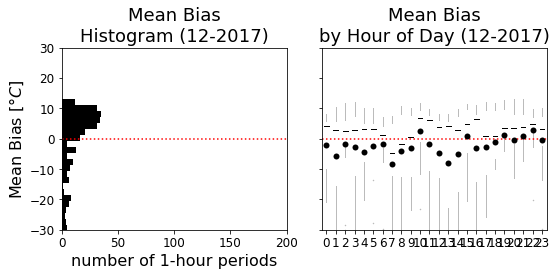

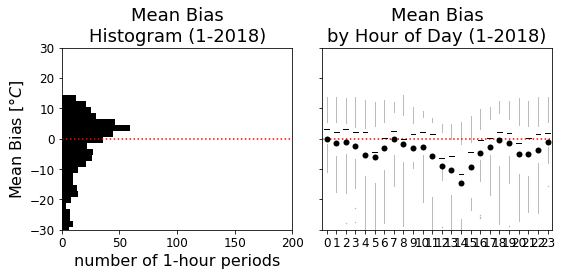

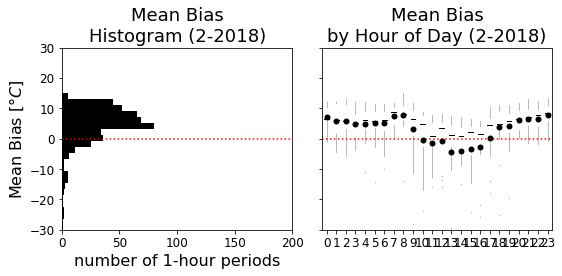

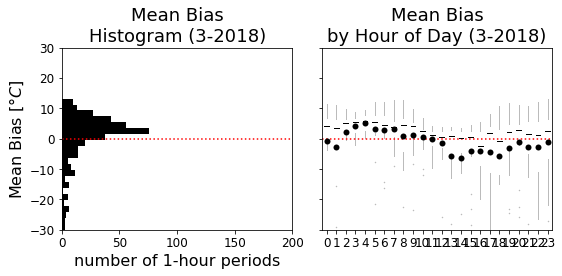

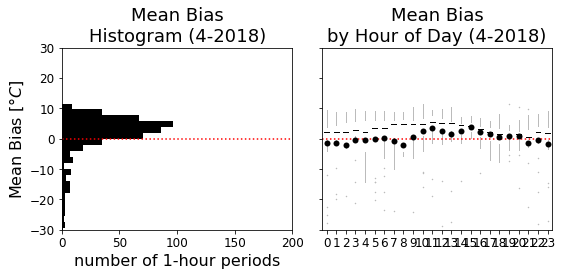

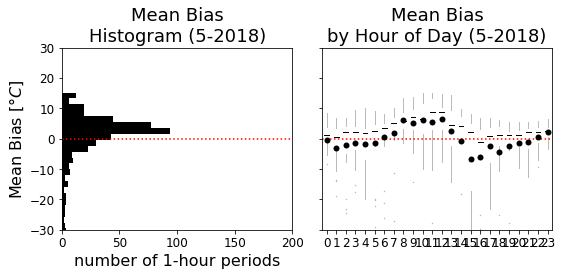

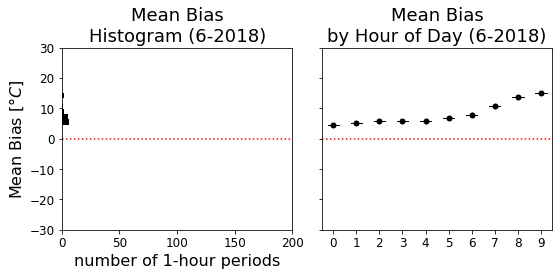

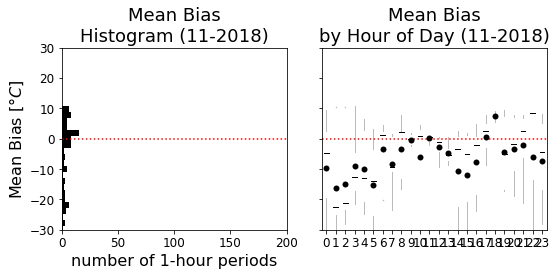

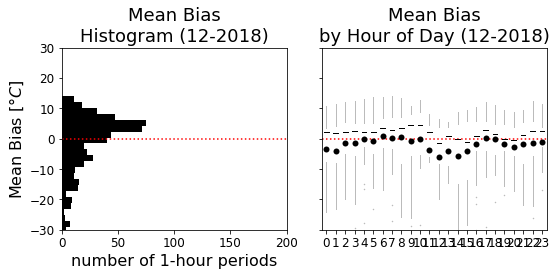

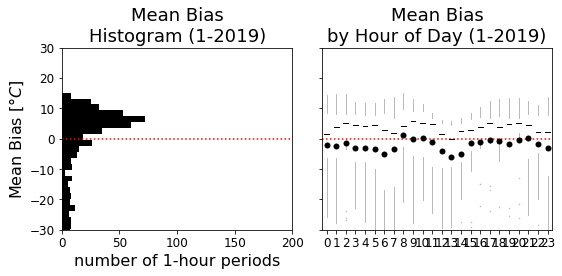

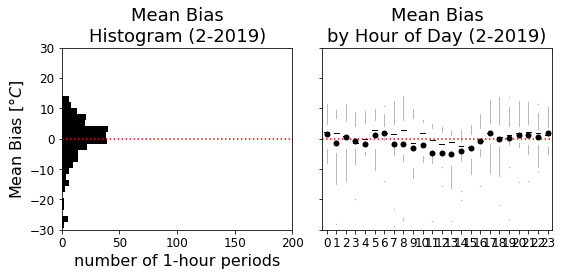

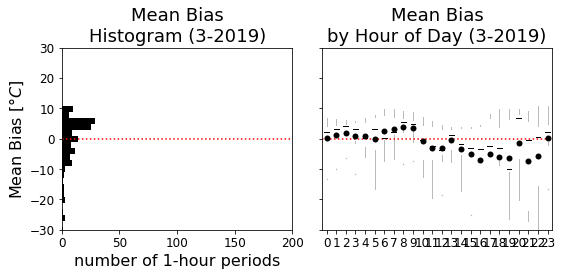

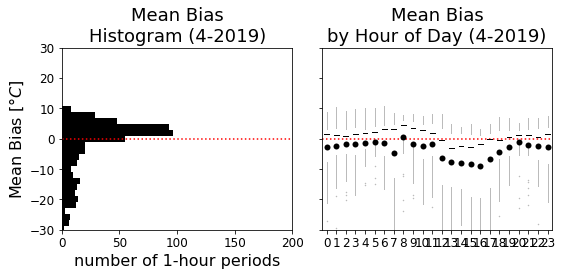

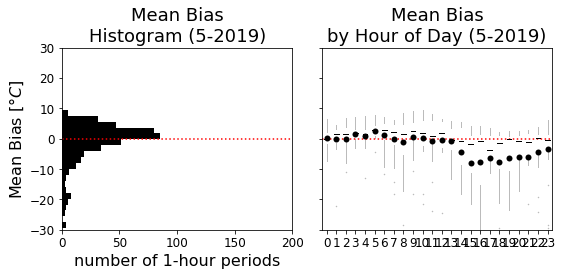

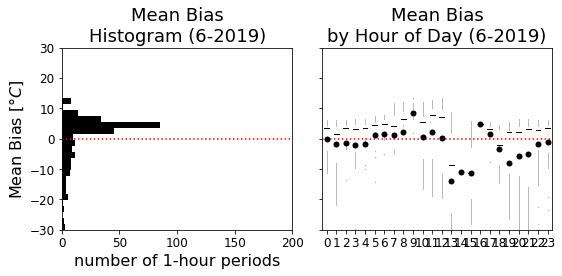

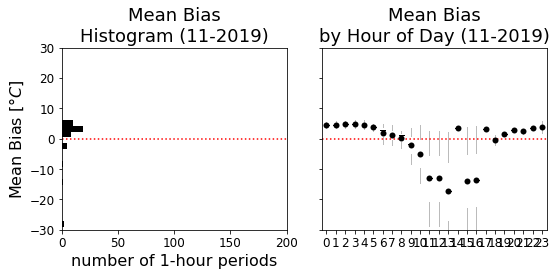

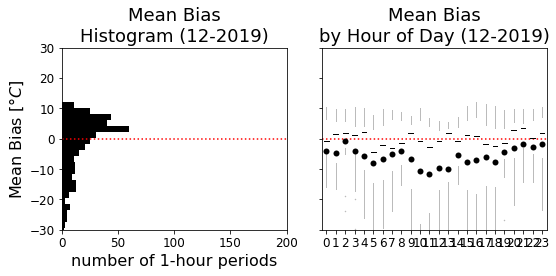

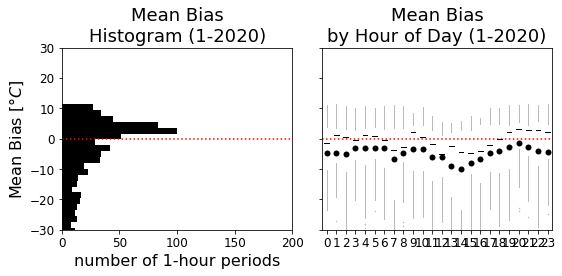

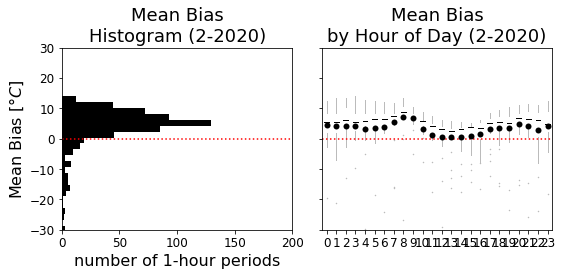

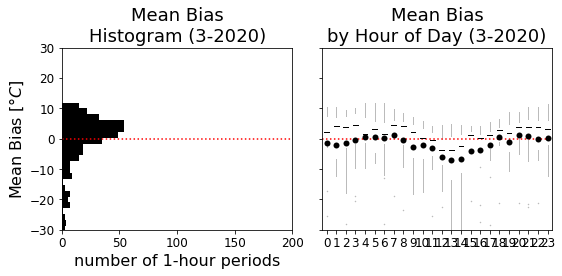

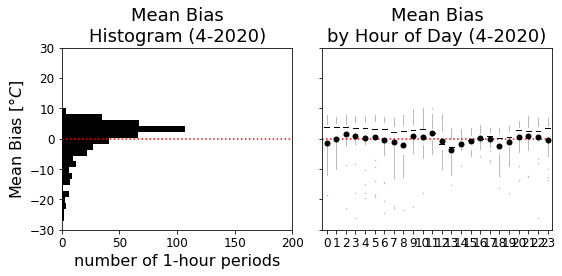

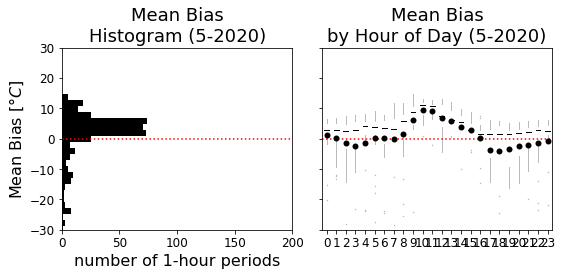

In [39]:
df = df_snow_1.copy()

for year in df.index.year.unique():
    mask = df.index.year==year
    df_n = df.loc[mask]
    
    for month in df_n.index.month.unique():
        mask = df_n.index.month==month
        df_m = df_n.loc[mask]

        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

        # MAE Boxplots
        boxplot = df_m.boxplot(column='mbe', by=df_m.index.hour,
                             ax=ax[1],
                             backend='matplotlib',
                             grid=False,
                             meanline=False,
                             showbox=False,
                             showcaps=False,
                             showmeans=True,
                             color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                             boxprops=boxprops,
                             whiskerprops=whiskerprops,
                             capprops=capprops,
                             flierprops=flierprops,
                             medianprops=medianprops,
                             meanprops=meanpointprops)
        ax[1].set_title('Mean Bias\nby Hour of Day ({}-{})'.format(month,year))
        plt.suptitle('') # this removes pandas' default title
        ax[1].set_xlabel('') # this removes pandas' default x labels
        # Boxplot x-axis formatting
        #plt.xticks(rotation=45, horizontalalignment='center');
        ax[1].axhline(0,linestyle=':',color='r')


        # MAE Histogram
        ax[0].hist(df_m.mbe,
                   bins=int((df_m.mbe.max() - df_m.mbe.min())/2)+1,
                   orientation='horizontal',
                   color = '#000000',
                   ec='none',
                   lw=1)
        ax[0].axhline(0,linestyle=':',color='r')
        ax[0].set_title('Mean Bias\nHistogram ({}-{})'.format(month,year))
        # Histogram x-axis formatting
        ax[0].set_xlabel('number of 1-hour periods')
        ax[0].set_xlim(0,200)

        # Format shared y-axis
        plt.ylim(-30,30);
        ax[0].set_ylabel('Mean Bias [$\degree C$]')

        plt.tight_layout()
        plt.savefig('figures/mean-bias-hourly-{}-{}.jpg'.format(month,year))

Same as above, but group years together too:

Look at hour of day for each month (using the 1-hourly stats)

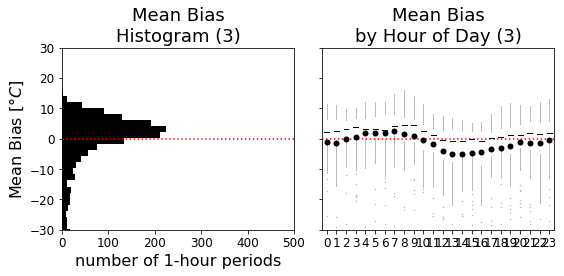

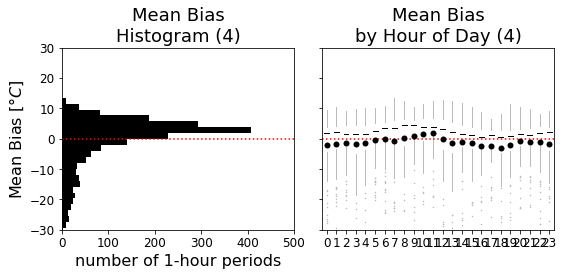

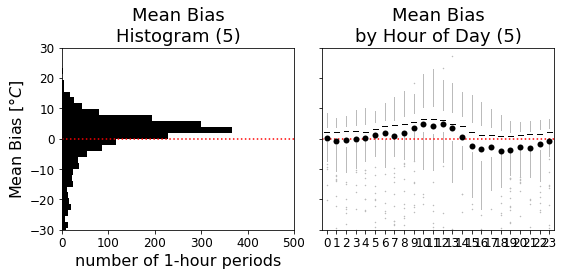

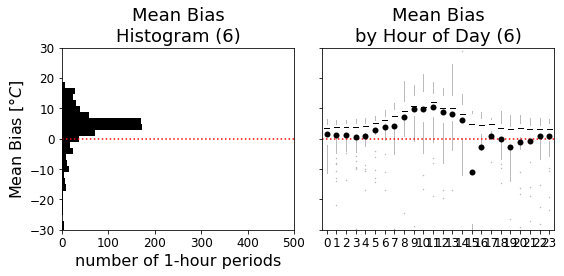

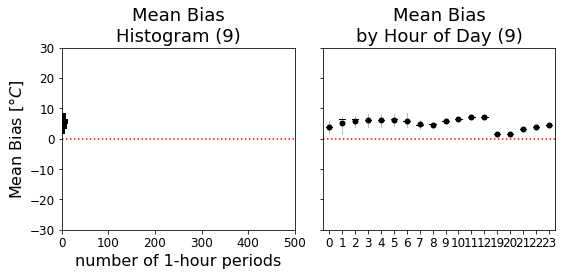

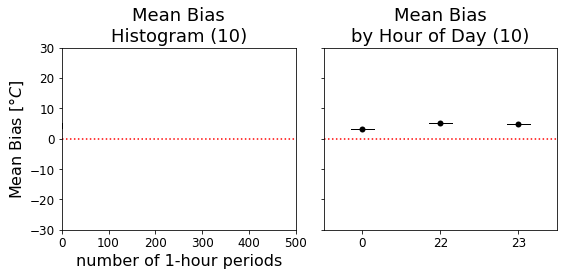

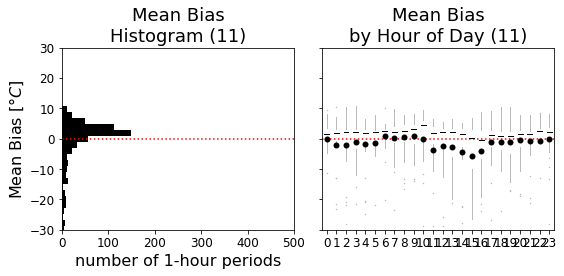

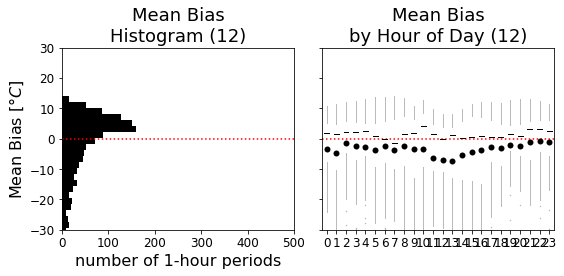

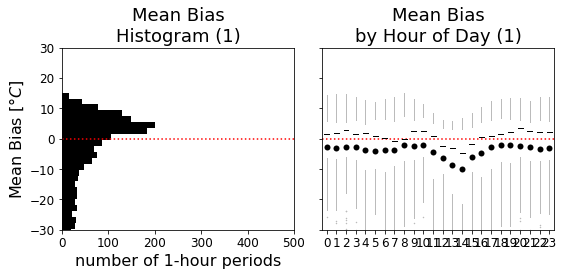

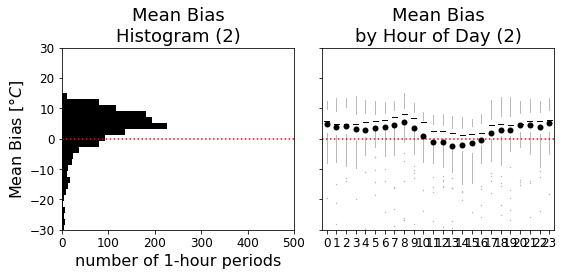

In [44]:
df = df_snow_1.copy()


for month in df.index.month.unique():
    mask = df.index.month==month
    df_m = df.loc[mask]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

    # MAE Boxplots
    boxplot = df_m.boxplot(column='mbe', by=df_m.index.hour,
                         ax=ax[1],
                         backend='matplotlib',
                         grid=False,
                         meanline=False,
                         showbox=False,
                         showcaps=False,
                         showmeans=True,
                         color=dict(boxes='#bbbbbb', whiskers='#bbbbbb', medians='k', caps='none'),
                         boxprops=boxprops,
                         whiskerprops=whiskerprops,
                         capprops=capprops,
                         flierprops=flierprops,
                         medianprops=medianprops,
                         meanprops=meanpointprops)
    ax[1].set_title('Mean Bias\nby Hour of Day ({})'.format(month))
    plt.suptitle('') # this removes pandas' default title
    ax[1].set_xlabel('') # this removes pandas' default x labels
    # Boxplot x-axis formatting
    #plt.xticks(rotation=45, horizontalalignment='center');
    ax[1].axhline(0,linestyle=':',color='r')


    # MAE Histogram
    ax[0].hist(df_m.mbe,
               bins=int((df_m.mbe.max() - df_m.mbe.min())/2)+1,
               orientation='horizontal',
               color = '#000000',
               ec='none',
               lw=1)
    ax[0].axhline(0,linestyle=':',color='r')
    ax[0].set_title('Mean Bias\nHistogram ({})'.format(month))
    # Histogram x-axis formatting
    ax[0].set_xlabel('number of 1-hour periods')
    ax[0].set_xlim(0,500)

    # Format shared y-axis
    plt.ylim(-30,30);
    ax[0].set_ylabel('Mean Bias [$\degree C$]')

    plt.tight_layout()
    plt.savefig('figures/mean-bias-hourly-{}.jpg'.format(month))